# Assignment 4

## Xuan Hong

## 60135167

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.misc as mis
%matplotlib inline

## Question 1

(a)

\begin{align*}
f(x) &= \ln(\ln x) \\
f'(x) &= \frac{1}{\ln (x)} \cdot (\ln (x))' = \frac{1}{x \ln (x)} \\
f''(x) &= - \frac{(x \ln (x))'}{(x \ln (x))^2} = - \frac{\ln (x)+x \cdot \frac{1}{x}}{(x \ln (x))^2} =  - \frac{\ln (x)+1}{(x \ln (x))^2} \\
\end{align*}

(b)

Prove $\left| f''(x) \right| \leq  \frac{2}{e^2}$ for $x \geq e$


for $x = e$, 
\begin{align*}
|f''(e) |&=  \frac{\ln (e)+1}{(e \ln (e))^2} =  \frac{2}{e^2}
\end{align*}

for $x > e$, 
\begin{align*}
& \ln (x) > \ln (e) =1 \\
(x \ln (x))^2 - e ^2 & = (x \ln(x) + e)\cdot (x \ln(x) - e) > \ln (x) - 1 = \ln (x) + 1 - 2  \\
\end{align*}

Therefore, the difference of the denominator is larger than the difference of numerator.

\begin{align*}
\left|f''(x) \right| &= \frac{\ln (x)+1}{(x \ln (x))^2} < \frac{2}{e^2}
\end{align*}


In [12]:
x = np.linspace(np.e,10000,1000000)
df = -(np.log(x)+1)/(x**2*(np.log(x))**2)
all(abs(df) <= 2/(np.e**2))

True

(c)

In [25]:
def log_log(u,abs_tolerance=0.0001):
    '''
    "ompute the approximation of the integral using trapezoid rule"
    The function takes the input parameters and compute the value of value of 
    integral use trapezoid rule.
    
    Input:  u: a positive number, the function calculation parameter.
            abs_tolerance: a positive number, the limitation (with default value 0.0001).
    Output: The approximation of the integral
    '''
    # set N
    N = 10000
    # set x
    x = np.linspace(np.e,u,N)
    # compute y
    y = np.log(np.log(x))
    return spi.trapz(y,x)

In [26]:
log_log(5,0.0001)

0.63995448190170623

## Question 2

(a) 

\begin{align*}
f(x) &= e^{-x^2} \\
f'(x) &= - 2x \cdot e^{-x^2}\\
f''(x) &= -2e^{-x^2} - 2x \cdot (- 2x \cdot e^{-x^2}) = -2e^{-x^2} + 4x^2e^{-x^2} \\
f'''(x) &= 4xe^{-x^2} + 8xe^{-x^2} + 4x^2e^{-x^2} \cdot (-2x) = 12xe^{-x^2} -8x^3e^{-x^2} \\
f''''(x) &= 12e^{-x^2} + 12x \cdot -2x e^{-x^2} - 24 x^2e^{-x^2} - 8x^3e^{-x^2} \cdot (-2x) \\
& =  12e^{-x^2} - 24x^2e^{-x^2} - 24 x^2e^{-x^2} + 16x^4e^{-x^2} = 12e^{-x^2} - 48x^2e^{-x^2} + 16x^4e^{-x^2} \\
\end{align*}

(b)

Since $x \in [0,5], e^{-x^2} \in (0,1)$ so
\begin{align*}
\left | f''''(x) \right| 
& = \left | 12e^{-x^2} - 48x^2e^{-x^2} + 16x^4e^{-x^2} \right| \\
& \leq \left | f''''(0) \right| =12 \\
\end{align*}

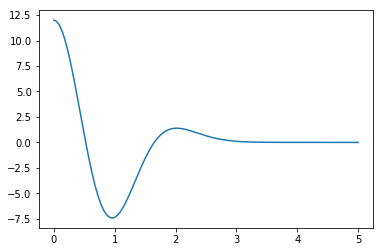

In [23]:
# set N
N = 1000
# set x
x = np.linspace(0,5,N)
# compute df
df = 12*(np.e**(-x**2)) - 48*(x**2)*(np.e**(-x**2)) + 16*(x**4)*(np.e**(-x**2))
# plot x and df
plt.plot(x,df)
plt.show()

In [27]:
def erf(u,abs_tolerance=0.0001):
    '''
    "Compute the integral use Simpon's rule."
    The function takes the input parameters and compute the value of 
    integral use Simpson's rule.
Input:  u: a positive number, the function calculation parameter.
            abs_tolerance: a positive number, the limitation (with default value 0.0001).
    Output: The approximation of the integral
    '''
    # set N
    N = 1000
    # set x
    x = np.linspace(0,u,N)
    # compute y
    y = np.e**(-x**2)
    return spi.simps(y,x)

In [28]:
erf(15,0.0001)

0.88622664338911461

## Question 3

In [2]:
def derivatives(f,a,n,h=0.001):
    '''
    "Compute the approximations of the nth order derivatives."
    The function takes the input parameters and compute the nth order derivatives, 
    and return the array
    
    Input:  f: a function.
            a: a number, the function calculation parameter.
            n: a positive number, the function calculation parameter.
            h: a positive number, the limitation(with default value 0.001)
    Output: The approximations of nth derivatives
    '''
    # set df
    df = []
    # compute fn in the range
    for i in range(1,n+1):
        term = [((-1)**k)*(mis.factorial(i)/(mis.factorial(k)*mis.factorial(i-k)))*(f(a+(i-2*k)*h)) for k in np.arange(0,i+1)]
        fn = 1/((2**i)*(h**i)) * np.sum(term)
        # append fn into df
        df.append(fn)
    return np.array(df)

In [3]:
derivatives(lambda x:x**2+1,20,4,0.001)

array([  4.00000000e+01,   2.00000001e+00,  -2.84217094e-05,
        -1.06581410e-02])

## Question 4

In [10]:
def taylor(f,a,n,L):
    '''
    "Draw the plot of f(x) and Taylor polynomial according to x "
    The function takes the input parameters and compute the value of f(x) and Taylor polynomial,
    then show the graph.
    
    Input:  f: the function.
            a: a positive number, the function calculation parameter, the range of x.
            n: a positive integer, the limitation.
            L: a positive integer, the limitation.
    Output: The plot of df and Tn with Tn.
    '''
    # set N
    N = 1000
    # set x
    x = np.linspace(a-L,a+L,N)
    # set y and T0
    y = f(x)
    T0 = [f(a)]   
    # compute Tn in the range
    terms = [derivatives(f,a,k)[-1]*(x-a)**k/mis.factorial(k) for k in range(1,n+1)]
    Tn = sum(T0 + terms)
    return plt.plot(x,y,x,Tn)

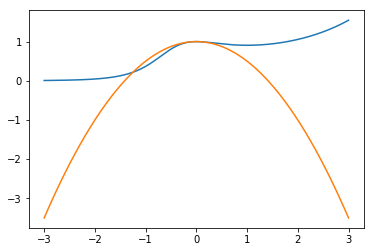

In [11]:
taylor(lambda x: np.exp(x) / (x**2 + x + 1),0,2,3)

## Question 5

In [5]:
def newton(f,x0,h=0.001,tolerance=0.001,max_iter=100):
    '''
    "Use Newton method to approximate the solution of f(x)=0"
    The 
    
    Input:  f: the function.
            x0: a positive number, the function calculation parameter.
            h: a positive number, the space(with default value 0.001).
            tolerance: a positive number, the limitation of f(x),(with default value 0.001).
            max_iter: a positive number, the calculate times(with default value 100).
    Output: The plot of df and Tn with Tn.
    '''
    # Intialize the list with the first x0
    xlist = [x0]
    # keep checking the interation times in the range of 0 and the maximum value
    for n in range(0,max_iter+1):
        # Compute the next xn use the poly eval and poly differential
        xn = xlist[n] - f(xlist[n])/((f(xlist[n]+h) - f(xlist[n]-h))/(2*h))
        # Chech if the derivative is zero
        if (f(xlist[n]+h) - f(xlist[n]-h))/(2*h) == 0:
            print('Zero derivative.')
            return None  
        # Check if the absolute value of p is smaller than tolerance,print and return value
        elif abs(f(xlist[n])) <= tolerance:
            return xlist[n]
        # otherwise, append the value of x and keep checking until reach the maximum iterations
        else:
            xlist.append(xn)
    # If cannot find the root when reaches the limitation, print and return none
    print('Maximum iterations exceeded.')
    return None

In [6]:
newton(lambda x:x**2*x+1,2)

-1.0000547099892403